<a href="https://colab.research.google.com/github/akarsh1207/Time-Series-Forecasting-and-Filtering/blob/main/Lorenz_%2B_Rosslers_Attractors_%2B_Noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lorenz Attractor with Noise
___

##Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
!pip install colorednoise
import colorednoise as cn
import pdb
plt.close('all')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Parameter definitions

In [2]:
"""

	Parameters
	----------
	system : string
		Type of system to solve (`lorenz_stochastic`, `rossler_stochastic`, or
	   `noise`). The default is `lorenz_stochastic`.
	observables : list
		Which variables are observed (0 is x, 1 is y, 2 is z).
		The default is [0].
	length : int
		Time series length. The default is 10000.
	x0 : list
		Starting condition. If None, a random starting condition is selected.
		The default is None.
	p : list
		List of system parameters. The default is for the Lorenz system:
		[10.0, 8.0/3.0, 28.0].
	step : int
		Integration step. The default is 0.001.
	sample : int
		Temporal sampling at output. The default is 0.03.
	discard : int
		Number of steps to discard at the beginning. The default is 1000.
	epsilon_sde : float
		Intensity of noise perturbing the dynamics. The default is 0.0.
	epsilon_add : float
		Intensity of observational noise. The default is 0.0.
	beta_add : int
		Exponent to characterize the power spectrum of the observational noise.
		For white noise beta_add = 0.0 (gaussian).
		For pink noise beta_add = 1.0 (flicker).
		For red noise beta_add = 2.0 (Browinan).
		The default is 0.0.

	Returns
	-------
	t_obs : array
		Time stamps at which the observation is taken.
	X_obs : 2-d array
		Observed time series.
	t_gen : array
		Time stamps at which the system has been integrated.
	X_gen : 2-d array
		Generated time series (i.e., without observational noise added).

	"""

'\n\n\tParameters\n\t----------\n\tsystem : string\n\t\tType of system to solve (`lorenz_stochastic`, `rossler_stochastic`, or\n\t   `noise`). The default is `lorenz_stochastic`.\n\tobservables : list\n\t\tWhich variables are observed (0 is x, 1 is y, 2 is z).\n\t\tThe default is [0].\n\tlength : int\n\t\tTime series length. The default is 10000.\n\tx0 : list\n\t\tStarting condition. If None, a random starting condition is selected.\n\t\tThe default is None.\n\tp : list\n\t\tList of system parameters. The default is for the Lorenz system:\n\t\t[10.0, 8.0/3.0, 28.0].\n\tstep : int\n\t\tIntegration step. The default is 0.001.\n\tsample : int\n\t\tTemporal sampling at output. The default is 0.03.\n\tdiscard : int\n\t\tNumber of steps to discard at the beginning. The default is 1000.\n\tepsilon_sde : float\n\t\tIntensity of noise perturbing the dynamics. The default is 0.0.\n\tepsilon_add : float\n\t\tIntensity of observational noise. The default is 0.0.\n\tbeta_add : int\n\t\tExponent to 

## Lorenz Stochastic

In [3]:
def _gen_lorenz_stochastic(length=10000, x0=None, sigma=10.0, \
						beta=8.0/3.0, rho=28.0,step=0.001, \
						sample=0.03, discard=1000, \
						epsilon_sde=0.0, observables=[0]):

	if not x0:
		x0 = (0.0, -0.01, 9.0) + 0.25 * (-1 + 2 * np.random.random(3))

	sample = int(sample / step)
	t = np.linspace(0, (sample * (length + discard)) * step, \
								  sample * (length + discard))
	Nt_simulation = len(t)
	X = np.zeros((Nt_simulation,3))
	X[0,:] = x0

	for tt in range(Nt_simulation-1):
		r = np.random.randn(3)
		X[tt+1,0] = X[tt,0] + (sigma * (X[tt,1] - X[tt,0])) * \
			step + epsilon_sde*np.sqrt(step)*r[0]
		X[tt+1,1] = X[tt,1] + (X[tt,0] * (rho - X[tt,2]) - \
			X[tt,1])*step + epsilon_sde*np.sqrt(step)*r[1]
		X[tt+1,2] = X[tt,2] + (X[tt,0] * X[tt,1] - beta * X[tt,2]) * \
			step + epsilon_sde*np.sqrt(step)*r[2]
	t_gen = t[discard*sample:]
	t_gen = t_gen-t_gen[0]
	X_gen = X[discard*sample:,:]
	t_obs = t[discard*sample::sample]
	t_obs = t_obs-t_obs[0]
	X_obs = X[discard*sample::sample, observables]
	return t_obs,X_obs,t_gen,X_gen


In [4]:
A = _gen_lorenz_stochastic()
print(A)

(array([0.00000000e+00, 3.00000909e-02, 6.00001818e-02, ...,
       2.99910909e+02, 2.99940909e+02, 2.99970909e+02]), array([[15.56706181],
       [15.04984428],
       [13.26554737],
       ...,
       [-3.45259881],
       [-4.08722367],
       [-4.84678212]]), array([0.00000000e+00, 1.00000303e-03, 2.00000606e-03, ...,
       2.99997909e+02, 2.99998909e+02, 2.99999909e+02]), array([[15.56706181, 16.05603125, 36.24916832],
       [15.57195151, 15.91155991, 36.4024491 ],
       [15.57534759, 15.76480582, 36.55314994],
       ...,
       [-5.66801433, -8.990502  , 16.86118208],
       [-5.70123921, -9.04464648, 16.86717722],
       [-5.73467328, -9.09907272, 16.87376377]]))


In [5]:
a = A[3]
x1 = a[:,0]
y1 = a[:,1]
z1 = a[:,2]

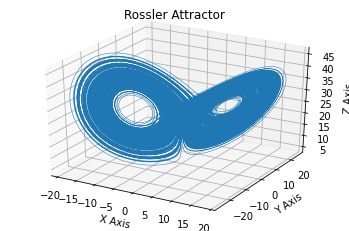

In [6]:
Visualisation = plt.figure().add_subplot(projection='3d')

Visualisation.plot(x1,y1,z1, lw=0.5)
Visualisation.set_xlabel("X Axis")
Visualisation.set_ylabel("Y Axis")
Visualisation.set_zlabel("Z Axis")
Visualisation.set_title("Rossler Attractor")

plt.show()

##Rossler Stochastic

In [7]:
def _gen_rossler_stochastic(length=10000, x0=None, a=0.2, b=0.2, c=5.7, \
						 step=0.001, sample=0.03, discard=1000, \
						 epsilon_sde=0.0, observables=[0]):

	if not x0:
		x0 = (-9.0, 0.0, 0.0) + 0.25 * (-1 + 2 * np.random.random(3))

	sample = int(sample / step)
	t = np.linspace(0, (sample * (length + discard)) * step, \
			  sample * (length + discard))

	Nt_simulation = len(t)
	X = np.zeros((Nt_simulation,3))
	X[0,:] = x0

	for tt in range(Nt_simulation-1):
		r = np.random.randn(1)
		X[tt+1,0] = X[tt,0] - (X[tt,1] + X[tt,2])*step + \
									epsilon_sde*np.sqrt(step)*r[0]
		X[tt+1,1] = X[tt,1] + (X[tt,0] + a*X[tt,1])*step
		X[tt+1,2] = X[tt,2] + (b + X[tt,2] * (X[tt,0]-c)) * step
		if np.isnan(X[tt+1,0]):
			pdb.set_trace()
		if np.isnan(X[tt+1,1]):
			pdb.set_trace()
		if np.isnan(X[tt+1,2]):
			pdb.set_trace()
	t_gen = t[discard*sample:]
	t_gen = t_gen-t_gen[0]
	X_gen = X[discard*sample:,:]
	t_obs = t[discard*sample::sample]
	t_obs = t_obs-t_obs[0]
	X_obs = X[discard*sample::sample, observables]

	return t_obs,X_obs,t_gen,X_gen

In [8]:
B = _gen_rossler_stochastic()
print(B)

(array([0.00000000e+00, 3.00000909e-02, 6.00001818e-02, ...,
       2.99910909e+02, 2.99940909e+02, 2.99970909e+02]), array([[-1.36254292],
       [-1.18547475],
       [-1.0062774 ],
       ...,
       [ 7.96157444],
       [ 8.22503105],
       [ 8.4821085 ]]), array([0.00000000e+00, 1.00000303e-03, 2.00000606e-03, ...,
       2.99997909e+02, 2.99998909e+02, 2.99999909e+02]), array([[-1.36254292, -5.89228738,  0.02587717],
       [-1.35667651, -5.89482838,  0.02589442],
       [-1.35080757, -5.89736402,  0.02591169],
       ...,
       [ 8.70772699, -8.46659628,  0.21868524],
       [ 8.7159749 , -8.45958187,  0.21954298],
       [ 8.72421494, -8.45255781,  0.22040512]]))


In [9]:
b = B[3]
x2 = b[:,0]
y2 = b[:,1]
z2 = b[:,2]

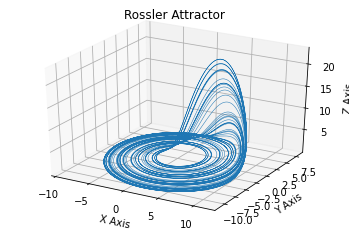

In [10]:
Visualisation = plt.figure().add_subplot(projection='3d')

Visualisation.plot(x2,y2,z2, lw=0.5)
Visualisation.set_xlabel("X Axis")
Visualisation.set_ylabel("Y Axis")
Visualisation.set_zlabel("Z Axis")
Visualisation.set_title("Rossler Attractor")

plt.show()

##Generation function

In [11]:
def _gen_data(system='lorenz_stochastic', observables=[0], \
		   length=10000, x0=None, p=[ 10,8.0/3.0, 28], step=0.001, \
		   sample=0.03, discard=1000, epsilon_sde=0.0, epsilon_add=0.0, \
		   beta_add=0.0):
		
	if system=='lorenz_stochastic':
		t_obs, X_obs, t_gen, X_gen = \
						_gen_lorenz_stochastic(length=length, \
							   x0=x0, sigma=p[0], beta=p[1], rho=p[2],\
							   step=step, sample=sample, \
							   discard=discard, \
							   epsilon_sde=epsilon_sde, \
							   observables=observables)
	elif system=='rossler_stochastic':
		t_obs, X_obs, t_gen, X_gen = \
						_gen_rossler_stochastic(length=length, \
							   x0=x0, a=p[0], b=p[1], c=p[2], \
							   step=step, sample=sample, \
							   discard=discard, \
							   epsilon_sde=epsilon_sde, \
							   observables=observables)
	elif system=='noise':
		Nx = len(observables)
		t_obs = np.arange(0,length*sample,sample)
		X_obs = np.zeros((t_obs.shape[0],Nx))
		t_gen = np.arange(0,length*step,step)
		X_gen = np.zeros((t_gen.shape[0],Nx))

	Nt,Nx = X_obs.shape
	for ii in np.arange(Nx):
		X_obs[:,ii] = X_obs[:,ii] + \
				epsilon_add * cn.powerlaw_psd_gaussian(beta_add, Nt)
	
	return t_obs, X_obs, t_gen, X_gen

In [12]:
C = _gen_data()
print(C)

(array([0.00000000e+00, 3.00000909e-02, 6.00001818e-02, ...,
       2.99910909e+02, 2.99940909e+02, 2.99970909e+02]), array([[9.56211808],
       [8.03778757],
       [6.63079876],
       ...,
       [5.71649947],
       [5.23071144],
       [4.95569072]]), array([0.00000000e+00, 1.00000303e-03, 2.00000606e-03, ...,
       2.99997909e+02, 2.99998909e+02, 2.99999909e+02]), array([[ 9.56211808,  4.48159635, 33.63786817],
       [ 9.51131287,  4.42320479, 33.59102074],
       [ 9.46043179,  4.36560364, 33.54351517],
       ...,
       [ 4.87820037,  4.88652463, 22.75489401],
       [ 4.87828361,  4.90722478, 22.71805174],
       [ 4.87857303,  4.9280844 , 22.68140911]]))


In [13]:
c = C[3]
x3 = c[:,0]
y3 = c[:,1]
z3 = c[:,2]
print(C[1])
print(C[1].shape)

[[9.56211808]
 [8.03778757]
 [6.63079876]
 ...
 [5.71649947]
 [5.23071144]
 [4.95569072]]
(10000, 1)


In [14]:
print(C[3])
print(C[3].shape)

[[ 9.56211808  4.48159635 33.63786817]
 [ 9.51131287  4.42320479 33.59102074]
 [ 9.46043179  4.36560364 33.54351517]
 ...
 [ 4.87820037  4.88652463 22.75489401]
 [ 4.87828361  4.90722478 22.71805174]
 [ 4.87857303  4.9280844  22.68140911]]
(300000, 3)


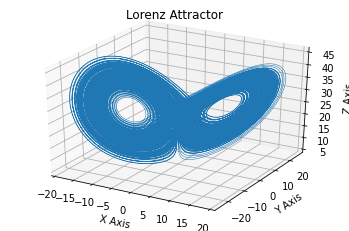

In [15]:
Visualisation = plt.figure().add_subplot(projection='3d')

Visualisation.plot(x3,y3,z3, lw=0.5)
Visualisation.set_xlabel("X Axis")
Visualisation.set_ylabel("Y Axis")
Visualisation.set_zlabel("Z Axis")
Visualisation.set_title("Lorenz Attractor")

plt.show()

##Plots

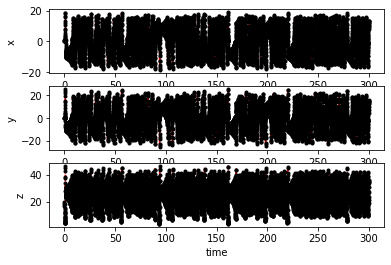

In [16]:
def main():
	t_obs, X_obs, t_gen, X_gen = _gen_data(system='lorenz_stochastic',
											observables=[0,1,2],
											length=10000,
											x0=None,
											p=[10, 8.0/3.0, 28],
											step=0.001,
											sample=0.03,
											discard=1000,
											epsilon_sde=0.0,
											epsilon_add=0.0,
											beta_add=0.0)
	ylabel = ['x','y','z']
	plt.figure()
	for ii in range(3):
		plt.subplot(3,1,ii+1)
		plt.plot(t_gen, X_gen[:,ii],'--r')
		plt.plot(t_obs, X_obs[:,ii],'.k')
		plt.ylabel(ylabel[ii])
		if ii==2: plt.xlabel('time')
	
if __name__ == '__main__':
	main()

#Extension to the Code
___

##Forming a Univariate Series for X Y Z generated:

In [17]:
def univariate_series(sequence, n_steps):
  X1, Y1 = list(), list()
  for i in range(100000):
    end_input = i + n_steps
    if end_input > 99989:
     break
    seq_x, seq_y = sequence[i:end_input], sequence[end_input:end_input+10]
    X1.append(seq_x)
    Y1.append(seq_y)
  return np.array(X1), np.array(Y1)

X1, Y1 = univariate_series(x3,100)

In [18]:
def univariate_series(sequence, n_steps):
  X2, Y2 = list(), list()
  for i in range(100000):
    end_input = i + n_steps
    if end_input > 99989:
     break
    seq_x, seq_y = sequence[i:end_input], sequence[end_input:end_input+10]
    X2.append(seq_x)
    Y2.append(seq_y)
  return np.array(X2), np.array(Y2)

X2, Y2 = univariate_series(y3,100)

In [19]:
def univariate_series(sequence, n_steps):
  X3, Y3 = list(), list()
  for i in range(100000):
    end_input = i + n_steps
    if end_input > 99989:
     break
    seq_x, seq_y = sequence[i:end_input], sequence[end_input:end_input+10]
    X3.append(seq_x)
    Y3.append(seq_y)
  return np.array(X3), np.array(Y3)

X3, Y3 = univariate_series(z3,100)

##Input Vector Creation

In [20]:
New_X = np.stack([X1,X2,X3], axis=1)
New_Y = np.stack([Y1,Y2,Y3], axis=1)

##Train - Test Split

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(New_X, New_Y, test_size = 0.2, random_state = 0)

#MLP Model Unfiltered
___

##MLP Model

In [31]:
import tensorflow as tf 
mlp = tf.keras.models.Sequential()
mlp.add(tf.keras.layers.Dense(units=2, activation='relu'))
mlp.add(tf.keras.layers.Dense(units=2, activation='relu'))
mlp.add(tf.keras.layers.Dense(units=10))
mlp.compile(optimizer = 'adam', loss = 'mse')
mlp.fit(X_train,y_train, batch_size = 50, epochs = 100)

Epoch 1/100
1599/1599 [==============================] - 3s 2ms/step - loss: 192.3880
Epoch 2/100
1599/1599 [==============================] - 3s 2ms/step - loss: 76.5739
Epoch 3/100
1599/1599 [==============================] - 3s 2ms/step - loss: 21.4296
Epoch 4/100
1599/1599 [==============================] - 3s 2ms/step - loss: 5.0605
Epoch 5/100
1599/1599 [==============================] - 3s 2ms/step - loss: 1.1193
Epoch 6/100
1599/1599 [==============================] - 3s 2ms/step - loss: 0.5134
Epoch 7/100
1599/1599 [==============================] - 3s 2ms/step - loss: 0.4570
Epoch 8/100
1599/1599 [==============================] - 3s 2ms/step - loss: 0.3451
Epoch 9/100
1599/1599 [==============================] - 3s 2ms/step - loss: 0.3932
Epoch 10/100
1599/1599 [==============================] - 3s 2ms/step - loss: 0.2588
Epoch 11/100
1599/1599 [==============================] - 3s 2ms/step - loss: 0.2835
Epoch 12/100
1599/1599 [==============================] - 3s 2ms/step 

## Predicted Values Extraction

In [44]:
predicted_values = mlp.predict(X_test)
actual_values = (y_test)
def unstack(a, axis=0):
    return np.moveaxis(a, axis, 0)
X_pred,Y_pred,Z_pred = unstack(predicted_values, axis=1)
X_ac,Y_ac,Z_ac = unstack(actual_values, axis =1)

#L1 , L2 and H1 Error Metrics 

In [73]:
Loss1 = abs(predicted_values - actual_values)
for i in range (19978):
  for j in range(3):
    for k in range(10):
      L1 = 0
      L1 = L1 + Loss1[i][j][k]
L1_averaged = L1/10
print(L1_averaged)

0.13603862511262008


In [72]:
Loss2 = predicted_values - actual_values
for i in range (19978):
  for j in range(3):
    for k in range(10):
      L2 = 0
      L2 = L2 + (Loss2[i][j][k])*(Loss2[i][j][k])
L2_averaged = L2/10
print(L2_averaged)

0.18506507522531987


In [96]:
Huber = predicted_values - actual_values
delta = 1
for i in range (19978):
  for j in range(3):
    for k in range(10):
      H1=0
      if abs(Huber[i][j][k]) <= delta :
        H1 = H1 + 0.5*((Huber[i][j][k])*(Huber[i][j][k]))
      else:
        H1 = H1 + delta*Huber[i][j][k] - 0.5*delta*delta
Huber_averaged = H1/10
print(Huber_averaged)

0.08603862511262009
